In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

여기서는 분류와 회귀에 쓸 수 있는 **다층 퍼셉트론**을 다룬다

## 신경망 모델
**선형 회귀 모델의 예측 공식**

y_hat = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

-> y_hat은 입력 특성과 학습된 계수의 가중치의 합

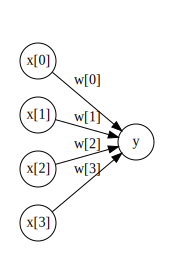

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())
# 입력 틍성과 예측은 노드로, 계수는 노드 사이의 연결로 나타낸 로지스틱 회귀

MLP에서는 가중치 합을 만드는 과정이 여러번 반복되며 중간 단계를 구성하는 **은닉 유닛** 계산 후 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치의 합 계산

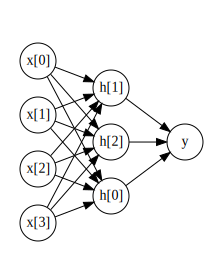

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

위와 같은 모델은 많은 가중치를 학습해야 함

이 가중치는 각 입력과 **은닉층**의 유닛 사이, 각 은닉 유닛과 출력 사이마다 있음

각 은닉 유닛의 가중치 합 계산 후 그 결과에 비선형 함수인 **렐루나 하이파볼릭 탄젠트** 적용

**렐루 함수**
- 0이하를 잘라버린다

**tanh 함수**
- 낮은 입력값에 대해서는 -1로 수렴
- 큰 입력값에 대해서는 +1로 수렴

-> 이러한 비선형 함수를 이용해 신경망이 선형 모델에서보다 더 복잡한 함수 학습 가능

Text(0, 0.5, 'relu(x), tanh(x)')

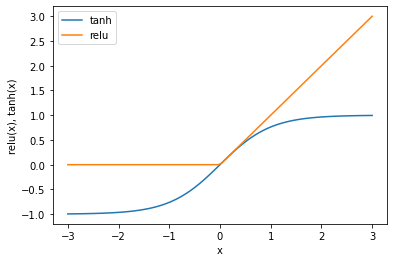

In [5]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

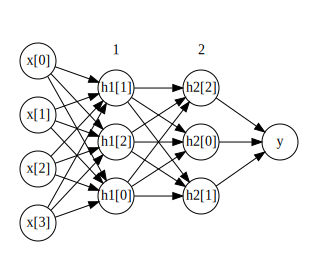

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

우리가 정해야 하는 중요한 매개변수는 **은닉층의 유닛 개수** 이다

위와 같이 많은 은닉층으로 구성된 대규모 신경망이 생기면서 이를 **딥러닝**이라 부른다

## 신경망 튜닝

Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


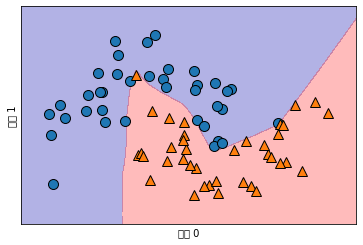

In [8]:
# two_moons 데이터셋에 분류를 위한 다층 퍼셉트론(MLP) 적용

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

위의 그림은 매끄러운 결정 경계를 만들었다

MLP는 기본 값으로 은닉 유닛 100개 사용 -> 여기에서는 데이터 셋이 작으므로 은닉 유닛 개수 줄여도 괜찮음

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


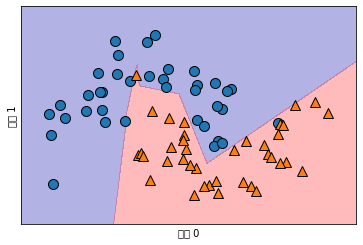

In [9]:
# 은닉 유닛 개수를 100개에서 10개로 줄임

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

결정 경계가 더 날카로워짐

기본 비선형 함수는 **렐루**함수

더 매끄러운 결정 경계를 만들기 위해
1. 은닉 유닛 추가
2. 은닉층을 추가 (여기서는 한개 사용)
3. ganh 함수 사용

Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


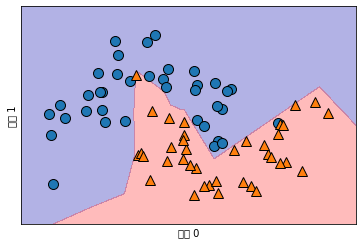

In [10]:
# 10개 유닛으로 구성된 2 개의 은닉층

mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


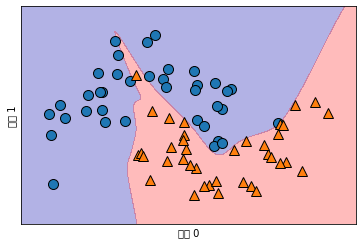

In [11]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 2개의 은닉층

mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


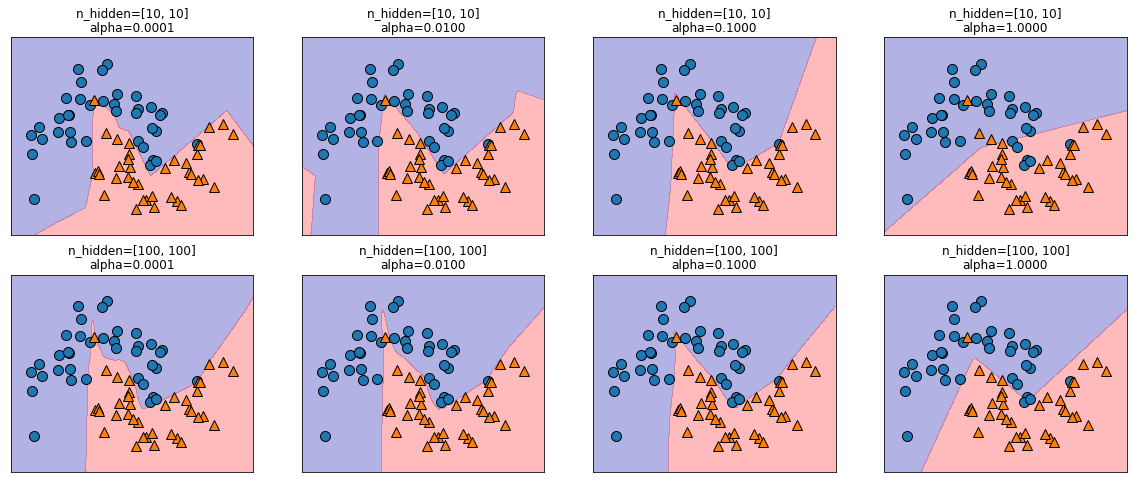

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):   # 각각 은닉 유닛을 다르게 적용
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):  # 각각 alpha를 다르게 적용
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))
        
# 은닉 유닛과 alpha 매개변수에 따라 변하는 결정 경계

신경망에서는 학습 시작 전 가중치를 무작위로 설정 -> 무작위로 초기화한 값이 모델의 학습에 영향을 줌

-> 같은 매개변수를 사용해도 초깃값이 다르면 모델이 많이 달라질 수 있음

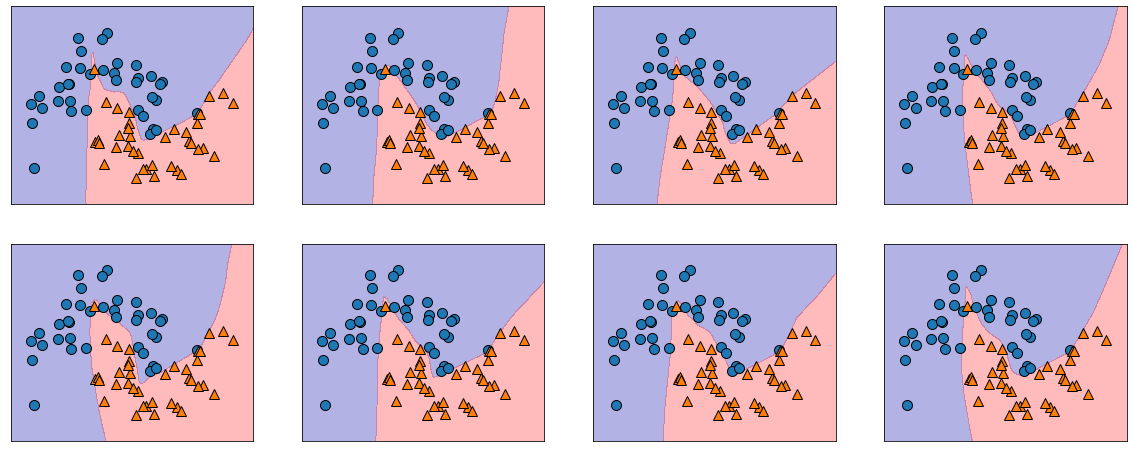

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

# 같은 매개변수를 가졌지만 초기화를 다르게 한 모델들

#### 유방암 데이터셋에 MLPClassfier(다층 퍼셉트론) 적용해보기
매개변수는 기본값 사용

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


MLP 정확도는 꽤 높지만 다른 모델만큼은 아님

앞의 SVC와 같이 신경망도 모든 입력 특성을 평균은 0, 분산은 1로 변형하는 것이 좋음

#### 데이터의 스케일 맞추기

In [17]:
# 훈련 세트 각 특성의 평균 계산
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준편차 계산
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 같은 변환을 테스트세트에도 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# 결과가 매우 좋아졌음

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
# 경고를 없애기 위해 반복횟수 늘리기


mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


위의 결과는 훈련 세트와 테스트 세트 사이에 성능 차이가 있으므로 모델의 복잡도를 낮춰야 한다

-> alpha 매개변수를 증가시켜보기 (0.0001에서 1로)

In [19]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# 가장 좋은 모델의 성능과 동일

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


신경망의 학급 분석은 선형 모델이나 트리모델보다 훨씬 까다로움 -> 모델의 가중치를 확인

아래의 그림은 입력과 은닉층 사이의 학습된 가중치
- 행 : 30개의 입력 특성
- 열 : 100개의 은닉 유닛

- 밝은색 : 양수
- 어두운 색 : 음수

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45787 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from c

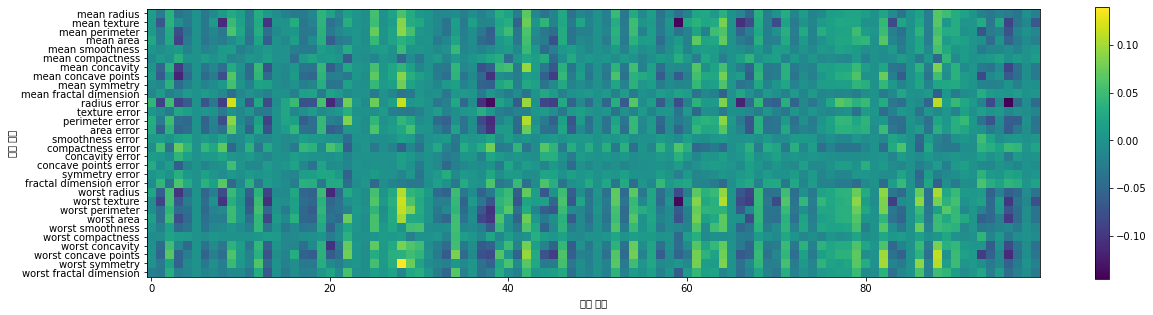

In [20]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

## 장단점과 매개변수
**장점**
- 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델 만들 수 있음
- 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 좋은 성능을 냄

**단점**
- 학습 시간이 오래 걸림
- 데이터 전처리에 주의해야 함

SVM과 비슷하게 모든 특성이 **같은 의미**를 가진 동질의 데이터에서 잘 작동

다른 종류의 특성을 가진 데이터 -> 트리 기반 모델에서 잘 작동

## 신경망의 복잡도 추정
가장 중요한 매개변수는 **은닉층의 개수와 각 은닝층의 유닛 수**

은닉층의 수
- 한개 또는 두개부터 시작해서 늘려나가기

은닉층 유닛의 수
- 보통 입력 특성의 수와 비슷하게 설정

**신경망 매개변수를 조정하는 일반적인 방법**
1. 먼저 충분히 과대적합되어 문제를 해결할 만한 큰 모델 만들기
2. 신경망 구조를 줄이거나 규제 강화를 위해 alpha값 증가시켜 일반화 성능 향상 시키기

**solver 매개변수** : 모델을 학습시키는 방법 또는 매개 변수 학습에 사용하는 알고리즘 지정
- adam : 대부분의 경우 잘 작동하지만 뎅터 스케이